# Interpolación vía diferencias divididas

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
#def funcion
def func(x):
    return np.log(x+1)


In [18]:
#puntos experimentales
x_list=[1.0,1.3,1.6,1.9,2.2]
y_list=[func(1.0),func(1.3),func(1.6),func(1.9),func(2.2)]
n=len(x_list)
f=np.zeros((n,n))


In [19]:
#matriz diferencias divididas
for i in range(0,n):
        f[i][0]=y_list[i]
for i in range(1,n-1):
    for j in range(1,i+1):
        f[i][j]=(f[i][j-1]-f[i-1][j-1])/(x_list[i]-x_list[i-j])           
        
def PoliLagrange(x_list,y_list,x):
    sum=y_list[0]
    for i in range(1,len(x_list)):
        prod=1
        for j in range(0,i):
                prod=prod*(x-x_list[j])
        sum=sum+f[i][i]*prod
    return sum
#print(PoliLagrange(x_list,y_list,1.45))                           

In [21]:
#evaluemos el polinomio hallado por diferencias divididas
x_array=np.linspace(min(x_list),max(x_list),100)
y_array=[]
for i in range(0,len(x_array)):
    y_array.append(PoliLagrange(x_list,y_list,x_array[i]))
    

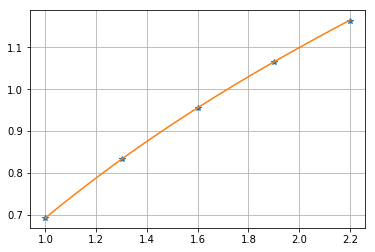

In [22]:
#grafiquemos
fig=plt.figure()
ax=plt.axes()
ax.plot(x_list,y_list,"*")
ax.plot(x_array,y_array)
plt.grid()
plt.show()

In [25]:
#determinemos el error e un punto de el polinomio interpolante vs la funcion real
y_der=PoliLagrange(x_list,y_list,1.45)
y_exac=func(1.45)
error=abs((y_der-y_exac)/y_exac*100)
print("error= ",error)
print(PoliLagrange(x_list,y_list,1.45))
print(func(1.45))

error=  0.003618514518798105
0.8961204496319055
0.8960880245566357


# Como funcion

In [ ]:

import numpy as np
import matplotlib.pyplot as plt


# Datos experimentales
x_list=[1.0,1.3,1.6,1.9,2.2]
y_list=[0.7651977,0.6200860,0.4554022,0.2818186,0.1103623]


def DiferenciaDividida(x_list,y_list):
    n=len(x_list)
    # Creando matriz de ceros
    a=np.zeros((n,n))
    # Llenando elementos de la diagonal
    for i in range(0,n):
        for j in range(0,n):
            if i==j:
                a[i][j] = y_list[i]
    for k in range(1,n):
        for i in range(0,n-1): # Limite superior evita la diagnoal
            for j in range(1,n): # Limite inferior evita la diagnoal
                if j!=i and j==i+k:
                    a[i][j]=(a[i+1][j]-a[i][j-1])/(x_list[j]-x_list[i])
    return a


def PolyNewton(x_list,y_list,x):
    n=len(x_list) # Número de datos experimentales
    sum=0
    for i in range(1,n):
        prod=1
        for j in range(0,i):
            prod=prod*(x-x_list[j])
        sum=sum+prod*a[0][i]
    P=a[0][0]+sum
    return P



x_interpolado=np.linspace(min(x_list),max(x_list),5000)
y_interpolado=PolyNewton(x_list,y_list,x_interpolado)



fig=plt.figure()
ax=plt.axes()
ax.plot(x_list,y_list,'.')
ax.plot(x_interpolado,y_interpolado,'-')
plt.show()